# PCA

In [1]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data
import models.model_utils as models

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

In [2]:
random_seed = int(os.getenv('RANDOM_SEED'))
random_seed

42

# Read Data

In [3]:
csv_file = load_data.combined_csv

if os.path.exists(csv_file):
    pass
else:
    load_data.__main__()
df = pd.read_csv(csv_file,index_col=0)

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])

df.shape

(78288, 232)

In [4]:
# data typing that is not retained by CSV
dp = load_data.DataPreprocessor(df)
df = dp.cast_data_types().get_dataframe()

# X features to transform

In [5]:
x_cols = dp.waves + dp.impedance + dp.control_panels + dp.snort + dp.status_flags
# excluding magnitudes and angles which compose the waves
# excluding frequency, impedance, control_panels, and snort logs which have low variance

X = df.loc[:,x_cols]

In [6]:
X.isna().sum()

R1_Phase_A_voltage_wave                     0
R1_Phase_A_pos_neg_zero_voltage_wave        0
R1_Phase_A_current_wave                     0
R1_Phase_A_pos_neg_zero_current_wave        0
R1_Phase_A_power_wave                       0
R1_Phase_A_pos_neg_zero_power_wave          0
R1_Phase_B_voltage_wave                     0
R1_Phase_B_pos_neg_zero_voltage_wave        0
R1_Phase_B_current_wave                     0
R1_Phase_B_pos_neg_zero_current_wave        0
R1_Phase_B_power_wave                       0
R1_Phase_B_pos_neg_zero_power_wave          0
R1_Phase_C_voltage_wave                     0
R1_Phase_C_pos_neg_zero_voltage_wave        0
R1_Phase_C_current_wave                     0
R1_Phase_C_pos_neg_zero_current_wave        0
R1_Phase_C_power_wave                       0
R1_Phase_C_pos_neg_zero_power_wave          0
R2_Phase_A_voltage_wave                     0
R2_Phase_A_pos_neg_zero_voltage_wave        0
R2_Phase_A_current_wave                     0
R2_Phase_A_pos_neg_zero_current_wa

# Scale Data

In [7]:
# scale and center data
std = StandardScaler()
X = std.fit_transform(X)

# PCA

In [8]:
# PCA
pca = PCA()
pca_data = pca.fit_transform(X)

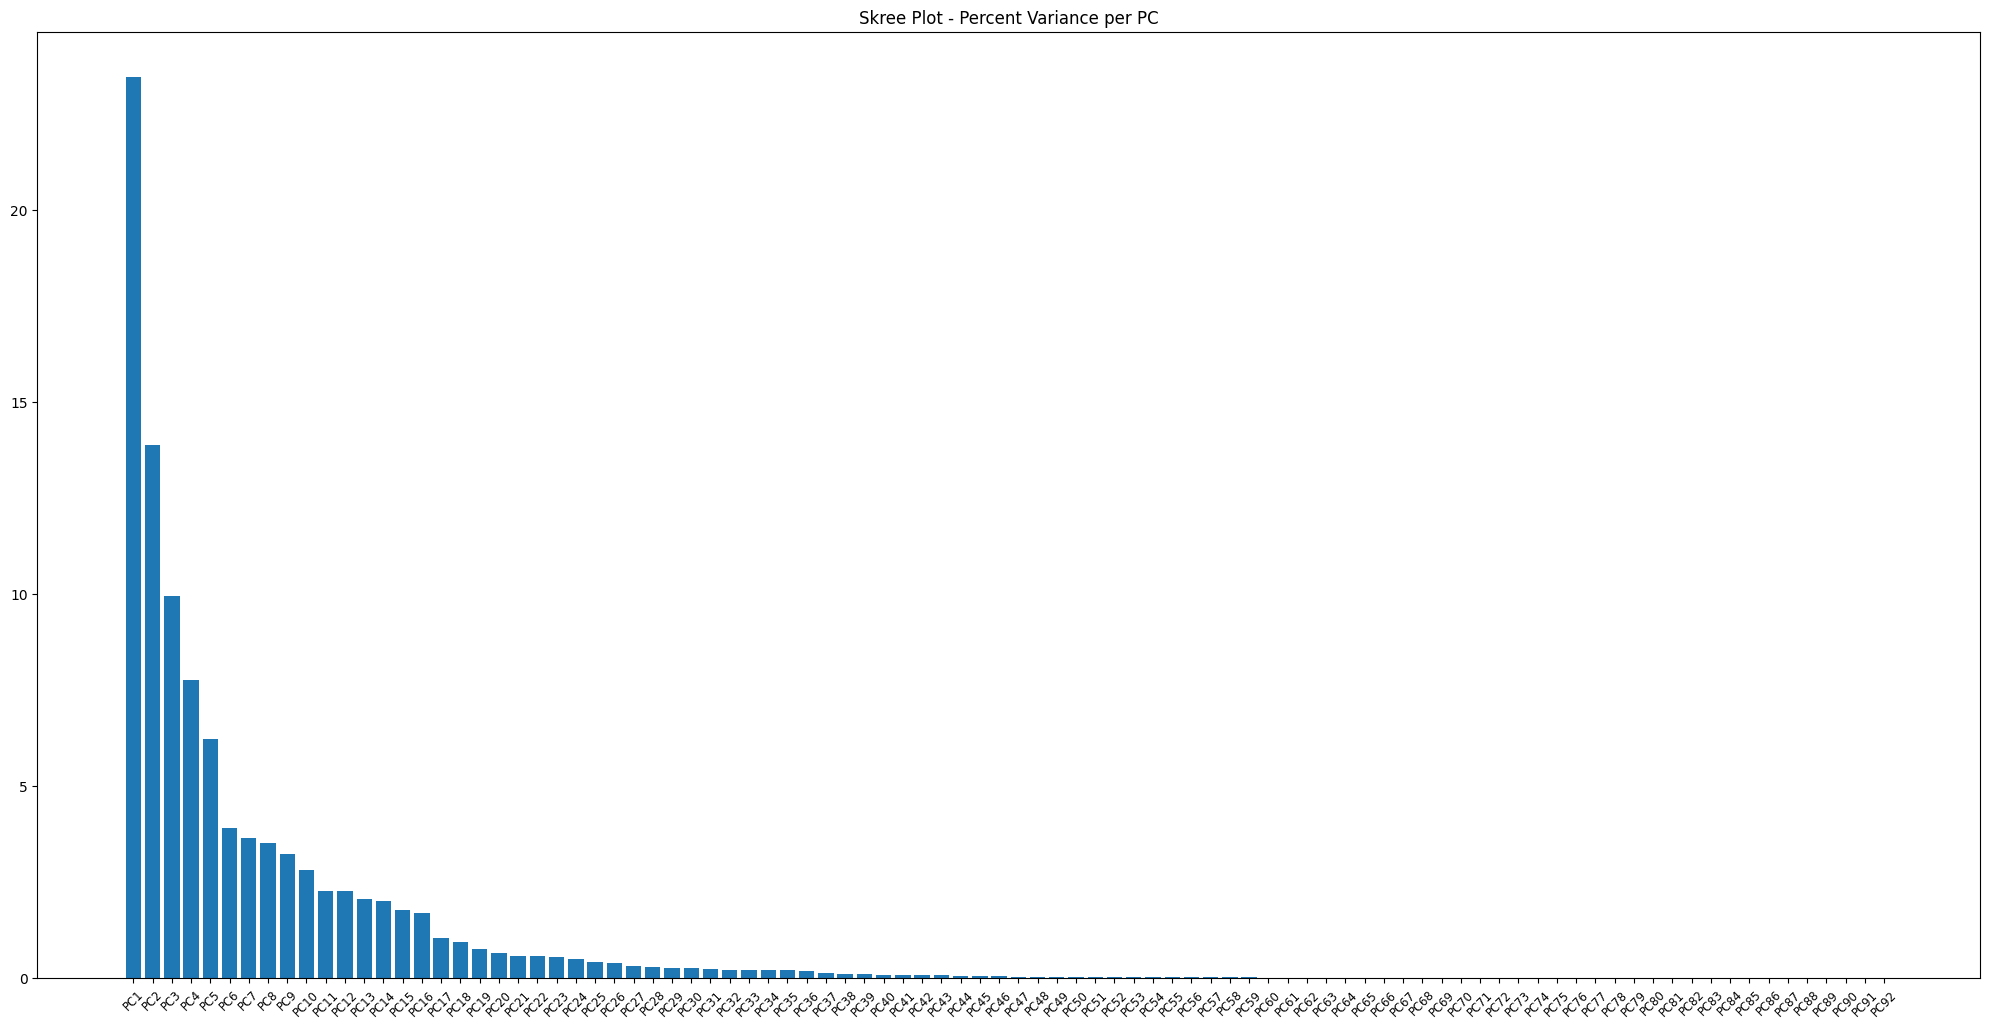

In [9]:
# skree plot
plt.figure(figsize=(20,10))
pct_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2) # pct variance attribution for each PC
PC_labels = ['PC' + str(i) for i in range(1, len(pct_variance)+1)] # generate PC1, PC2, PC3 labels
plt.bar(x=range(1, len(pct_variance)+1), height=pct_variance, tick_label=PC_labels)

plt.tight_layout()
plt.title('Skree Plot - Percent Variance per PC')
plt.xticks(rotation = 45, fontsize='small')
plt.show()

* Wave data for R1 covers >90% of the variance. R1 + R2 waves cover 99% of the variance.
* Impedance, logs, R3-R4 are negligible after.

In [ ]:
cumsum = 0
for i in range(len(pct_variance)):
    if cumsum < 100:
        cumsum += pct_variance[i]
        print(PC_labels[i],'\t',pct_variance[i],'\t',round(cumsum,2),,'\t',x_cols[i])

PC1 23.48 23.48 R1_Phase_A_voltage_wave
PC2 13.88 37.36 R1_Phase_A_pos_neg_zero_voltage_wave
PC3 9.95 47.31 R1_Phase_A_current_wave
PC4 7.76 55.07 R1_Phase_A_pos_neg_zero_current_wave
PC5 6.21 61.28 R1_Phase_A_power_wave
PC6 3.91 65.19 R1_Phase_A_pos_neg_zero_power_wave
PC7 3.64 68.83 R1_Phase_B_voltage_wave
PC8 3.5 72.33 R1_Phase_B_pos_neg_zero_voltage_wave
PC9 3.23 75.56 R1_Phase_B_current_wave
PC10 2.82 78.38 R1_Phase_B_pos_neg_zero_current_wave
PC11 2.27 80.65 R1_Phase_B_power_wave
PC12 2.27 82.92 R1_Phase_B_pos_neg_zero_power_wave
PC13 2.05 84.97 R1_Phase_C_voltage_wave
PC14 2.01 86.98 R1_Phase_C_pos_neg_zero_voltage_wave
PC15 1.76 88.74 R1_Phase_C_current_wave
PC16 1.68 90.42 R1_Phase_C_pos_neg_zero_current_wave
PC17 1.04 91.46 R1_Phase_C_power_wave
PC18 0.94 92.4 R1_Phase_C_pos_neg_zero_power_wave
PC19 0.75 93.15 R2_Phase_A_voltage_wave
PC20 0.65 93.8 R2_Phase_A_pos_neg_zero_voltage_wave
PC21 0.58 94.38 R2_Phase_A_current_wave
PC22 0.57 94.95 R2_Phase_A_pos_neg_zero_current_wave

In [ ]:
# example of loading scores with PC1 (R1_Phase_A_voltage_wave) - how much influence did it have in the variance of the other variables?
PC1_loading_scores = pd.Series(pca.components_[0], index=x_cols)
sorted_loading_scores = PC1_loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

R2_Phase_A_pos_neg_zero_voltage_wave        0.216580
R3_Phase_A_pos_neg_zero_voltage_wave        0.216557
R2_Phase_A_voltage_wave                     0.216410
R3_Phase_A_voltage_wave                     0.216388
R1_Phase_A_pos_neg_zero_voltage_wave        0.216001
R1_Phase_A_voltage_wave                     0.215981
R4_Phase_A_pos_neg_zero_voltage_wave        0.215974
R4_Phase_A_voltage_wave                     0.215956
R1_Phase_A_pos_neg_zero_current_wave        0.214075
R4_Phase_A_pos_neg_zero_current_wave        0.214004
R1_Phase_A_current_wave                     0.213023
R4_Phase_A_current_wave                     0.212952
R3_Phase_A_pos_neg_zero_current_wave        0.209975
R2_Phase_A_pos_neg_zero_current_wave        0.209819
R3_Phase_A_current_wave                     0.208318
R2_Phase_A_current_wave                     0.207892
R3_Phase_B_current_wave                     0.142997
R2_Phase_B_current_wave                     0.142522
R3_Phase_B_voltage_wave                     0.